# Anaylze Datasets

This notebook seeks to anaylze the different datasets to understand what data is inside of each one. Things like resolution, number of images, number of classes, etc. will be analyzed in this notebook.

In [1]:
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette('rainbow')
sns.set_context('talk')

In [2]:
root_dir = '/home/jack/Mounts/DiskOne/kona_coffee/datasets/compiled_base'

coco_data = None
with open(os.path.join(root_dir, 'coco.json'), 'r') as f:
    coco_data = json.load(f)
    
coco_data['categories']

[{'id': 1, 'name': 'leaf'}, {'id': 2, 'name': 'berry'}]

In [3]:
print(f"Total Annotations: {len(coco_data['annotations'])}")
print(f"Total Images: {len(coco_data['images'])}")

total_leaves = sum([1 for a in coco_data['annotations'] if a['category_id'] == 1])
total_berries = sum([1 for a in coco_data['annotations'] if a['category_id'] == 2])

print(f"Total Leaves: {total_leaves}")
print(f"Total Berries: {total_berries}")

Total Annotations: 8826
Total Images: 123
Total Leaves: 4858
Total Berries: 3968


             width       height  aspect_ratio          area
count   123.000000   123.000000    123.000000  1.230000e+02
mean   3687.804878  3482.926829      1.096206  1.261760e+07
std     578.835882   474.863521      0.287694  1.190261e+06
min    3024.000000  3024.000000      0.750000  1.219277e+07
25%    3024.000000  3024.000000      0.750000  1.219277e+07
50%    4032.000000  3456.000000      1.333333  1.219277e+07
75%    4032.000000  4032.000000      1.333333  1.219277e+07
max    4608.000000  4032.000000      1.333333  1.592525e+07


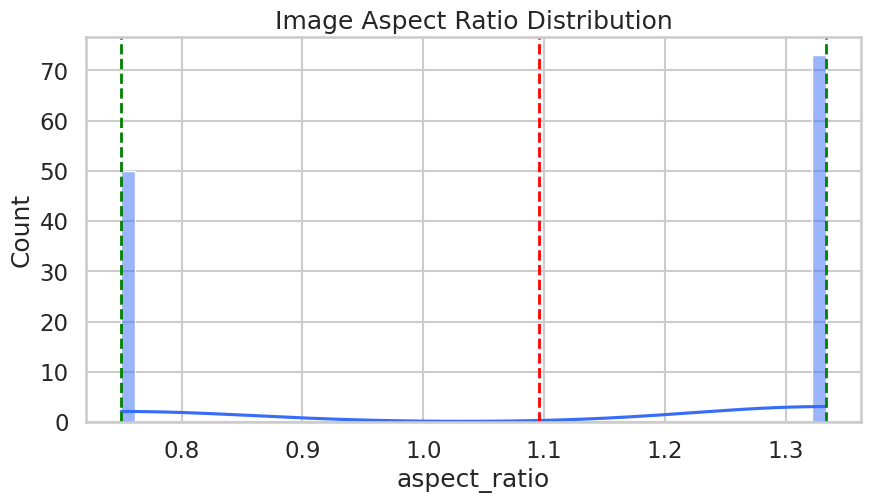

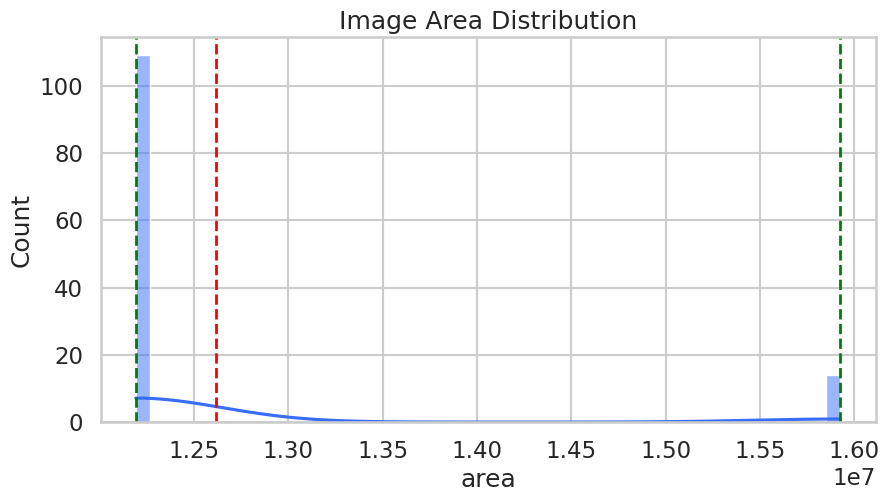

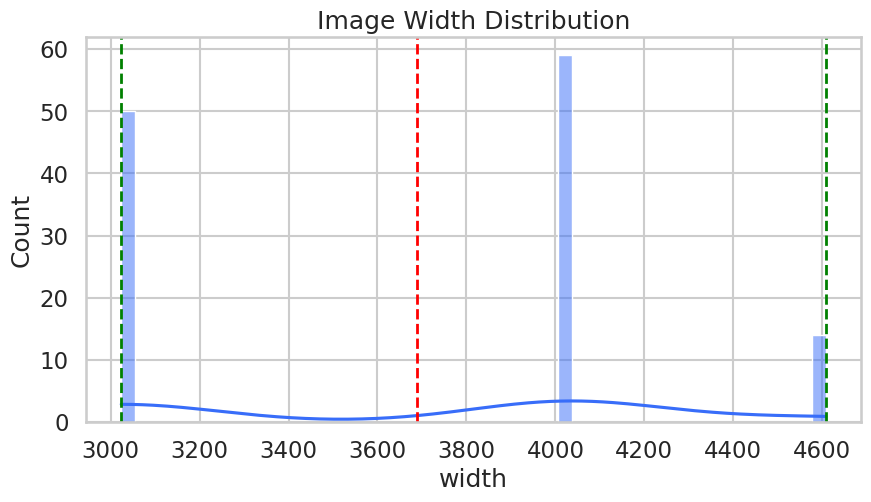

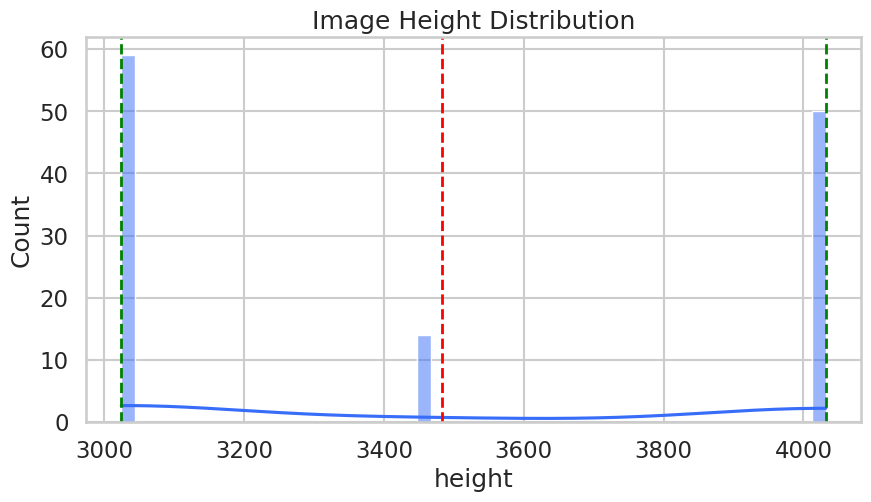

In [4]:
df = []

for image in coco_data['images']:
    df.append((image['width'], image['height']))
    
df = pd.DataFrame(df, columns=['width', 'height'])

df['aspect_ratio'] = df.width / df.height
df['area'] = df.width * df.height

print(df.describe())

plt.figure(figsize=(10, 5))
plt.title('Image Aspect Ratio Distribution')
sns.histplot(df.aspect_ratio, bins=50, kde=True)
plt.axvline(df.aspect_ratio.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.aspect_ratio, 95), color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.aspect_ratio, 5), color='g', linestyle='dashed', linewidth=2)

plt.figure(figsize=(10, 5))
plt.title('Image Area Distribution')
sns.histplot(df.area, bins=50, kde=True)
plt.axvline(df.area.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.area, 95), color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.area, 5), color='g', linestyle='dashed', linewidth=2)

plt.figure(figsize=(10, 5))
plt.title('Image Width Distribution')
sns.histplot(df.width, bins=50, kde=True)
plt.axvline(df.width.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.width, 95), color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.width, 5), color='g', linestyle='dashed', linewidth=2)

plt.figure(figsize=(10, 5))
plt.title('Image Height Distribution')
sns.histplot(df.height, bins=50, kde=True)
plt.axvline(df.height.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.height, 95), color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.height, 5), color='g', linestyle='dashed', linewidth=2)

Category: berry
Category: leaf


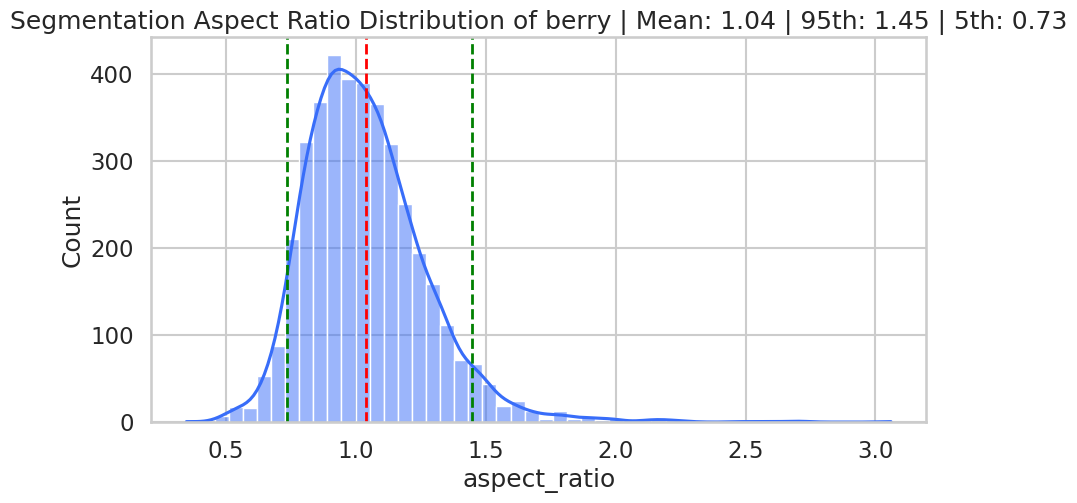

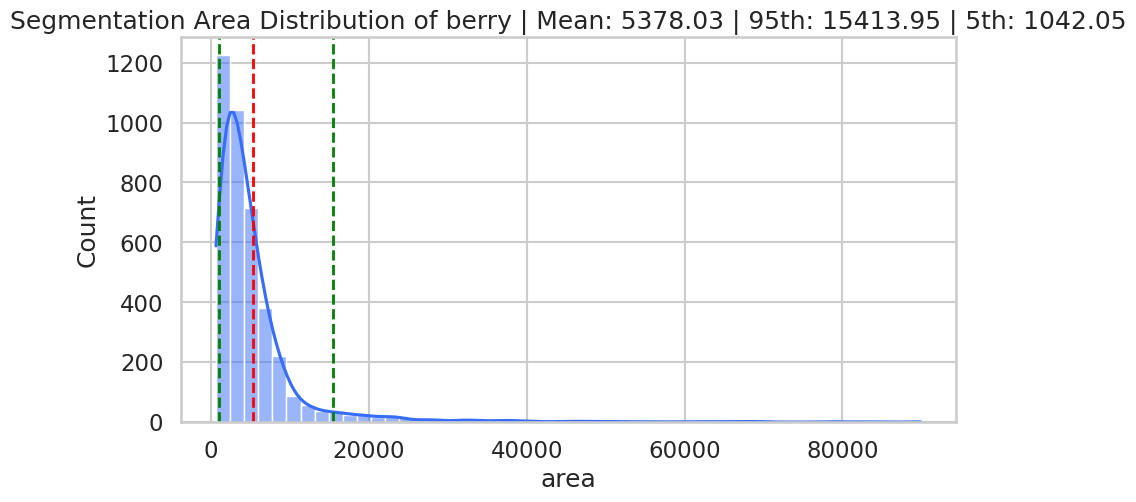

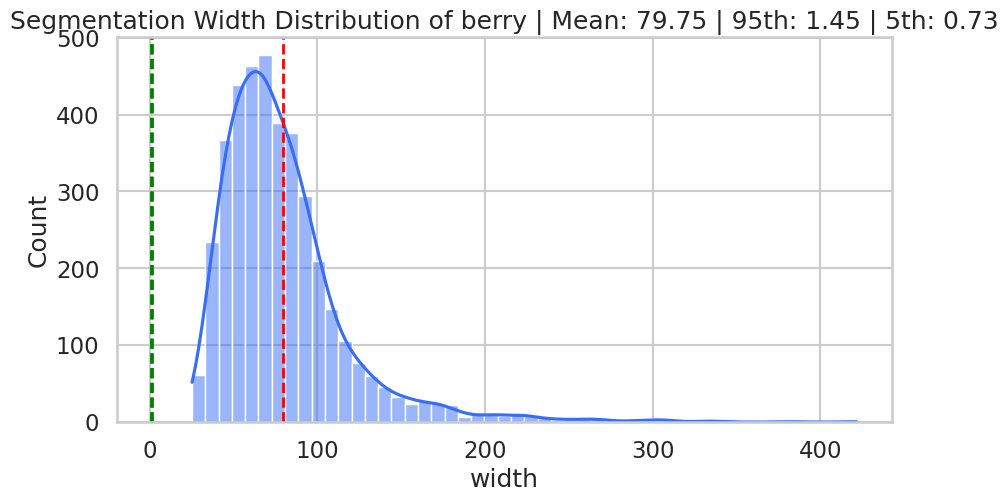

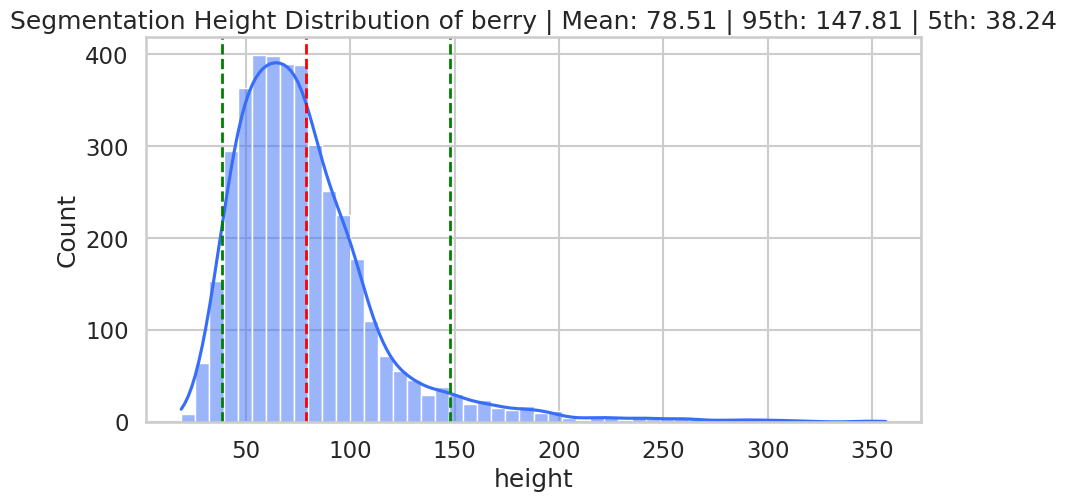

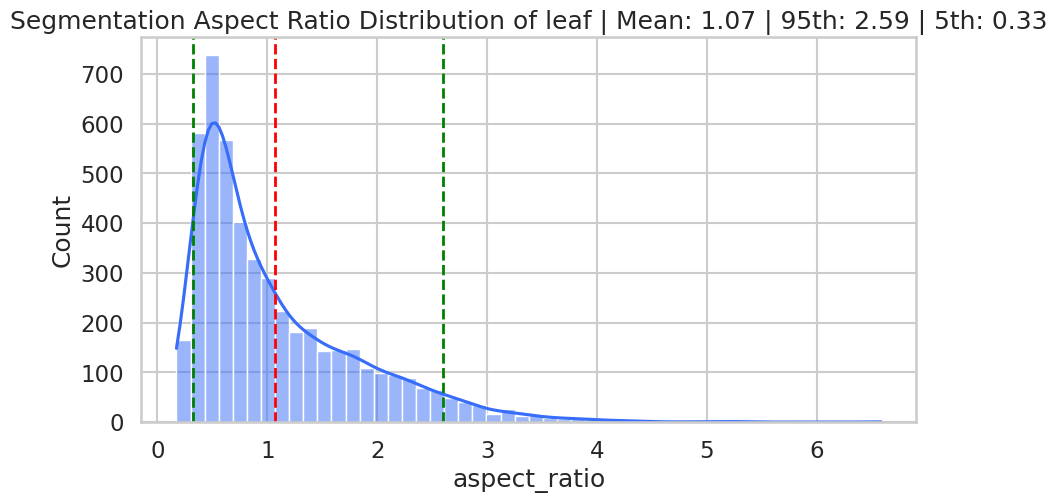

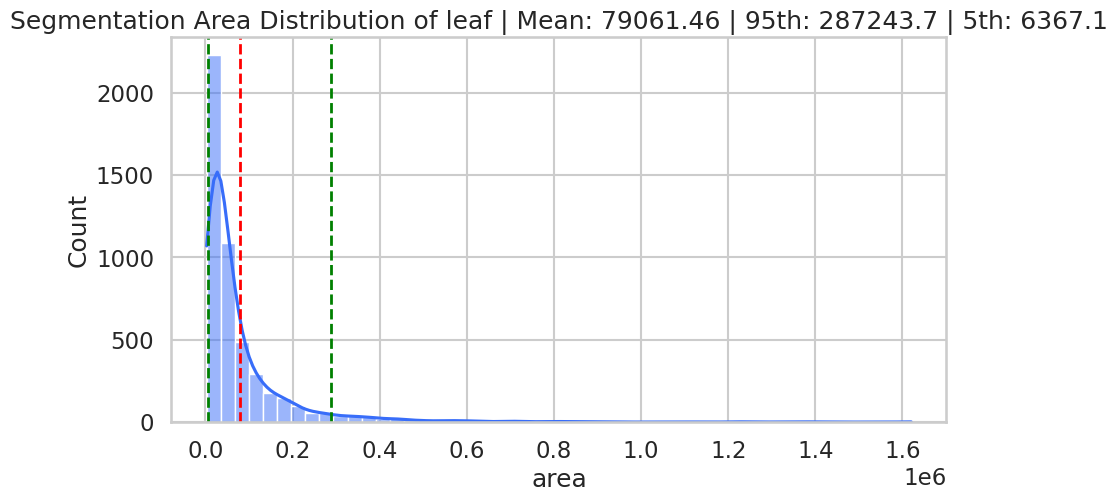

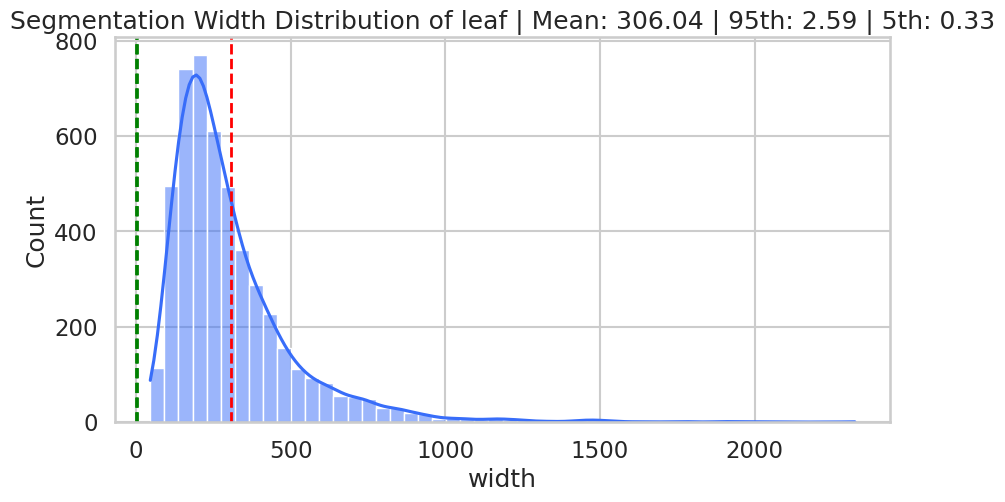

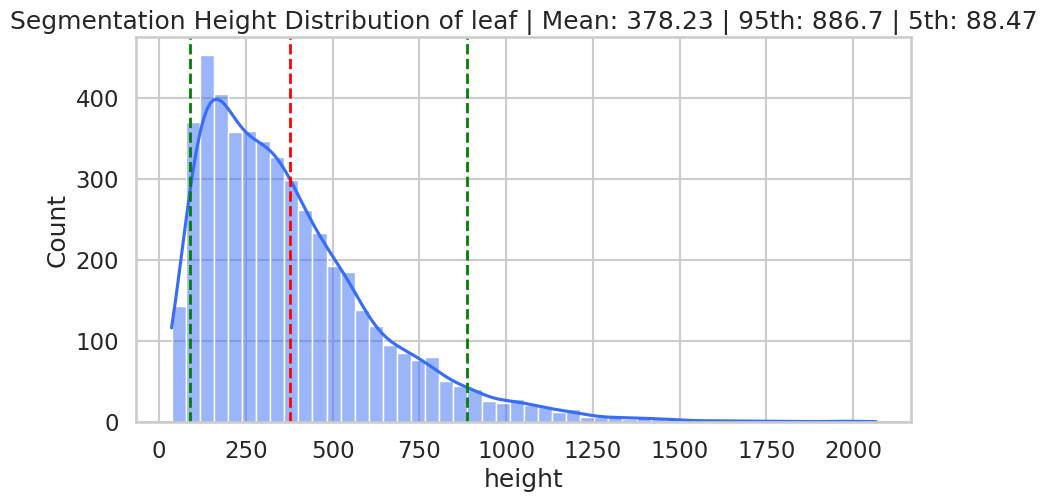

In [5]:
df = []

image_map = {}
category_map = {}

for category in coco_data['categories']:
    category_map[category['id']] = category['name']
    
for image in coco_data['images']:
    image_map[image['id']] = image

for annotation in coco_data['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    category = category_map[annotation['category_id']]
    df.append((width, height, annotation['area'], category))
    
df = pd.DataFrame(df, columns=['width', 'height', 'area', 'category'])

df['aspect_ratio'] = df.width / df.height

for group, sdf in df.groupby('category'):
    
    print(f"Category: {group}")
    
    mean = sdf.aspect_ratio.mean()
    percentile_95 = np.percentile(sdf.aspect_ratio, 95)
    percentile_5 = np.percentile(sdf.aspect_ratio, 5)
    plt.figure(figsize=(10, 5))
    plt.title(f'Segmentation Aspect Ratio Distribution of {group} | Mean: {round(mean, 2)} | 95th: {round(percentile_95, 2)} | 5th: {round(percentile_5, 2)}')
    sns.histplot(sdf.aspect_ratio, bins=50, kde=True)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_95, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_5, color='g', linestyle='dashed', linewidth=2)

    mean = sdf.area.mean()
    percentile_95 = np.percentile(sdf.area, 95)
    percentile_5 = np.percentile(sdf.area, 5)
    plt.figure(figsize=(10, 5))
    plt.title(f'Segmentation Area Distribution of {group} | Mean: {round(mean, 2)} | 95th: {round(percentile_95, 2)} | 5th: {round(percentile_5, 2)}')
    sns.histplot(sdf.area, bins=50, kde=True)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_95, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_5, color='g', linestyle='dashed', linewidth=2)

    mean = sdf.width.mean()
    percentile_95 = np.percentile(sdf.aspect_ratio, 95)
    percentile_5 = np.percentile(sdf.aspect_ratio, 5)
    plt.figure(figsize=(10, 5))
    plt.title(f'Segmentation Width Distribution of {group} | Mean: {round(mean, 2)} | 95th: {round(percentile_95, 2)} | 5th: {round(percentile_5, 2)}')
    sns.histplot(sdf.width, bins=50, kde=True)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_95, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_5, color='g', linestyle='dashed', linewidth=2)

    mean = sdf.height.mean()
    percentile_95 = np.percentile(sdf.height, 95)
    percentile_5 = np.percentile(sdf.height, 5)
    plt.figure(figsize=(10, 5))
    plt.title(f'Segmentation Height Distribution of {group} | Mean: {round(mean, 2)} | 95th: {round(percentile_95, 2)} | 5th: {round(percentile_5, 2)}')
    sns.histplot(sdf.height, bins=50, kde=True)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_95, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(percentile_5, color='g', linestyle='dashed', linewidth=2)

# Discover Recommended Anchor Aspect Ratios

Recommendations for anchor ratios of "berry": [0.842, 1.101, 1.455]
Recommendations for anchor ratios of "leaf": [0.596, 1.49, 2.673]


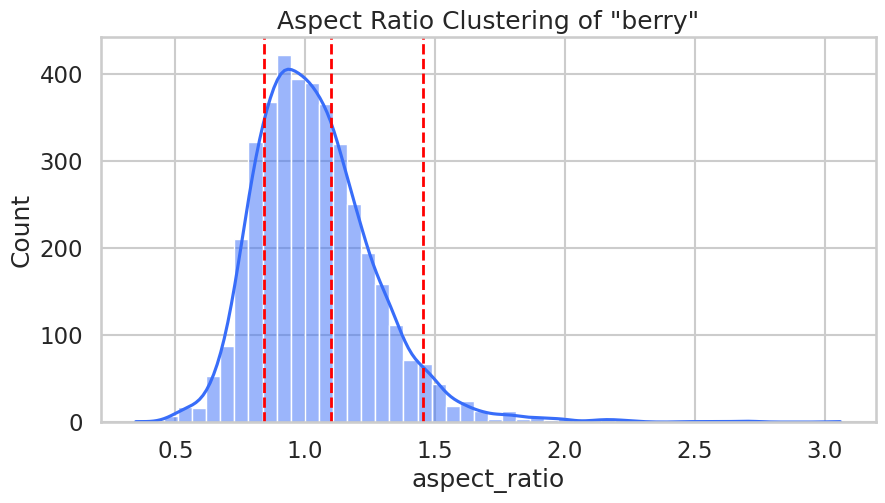

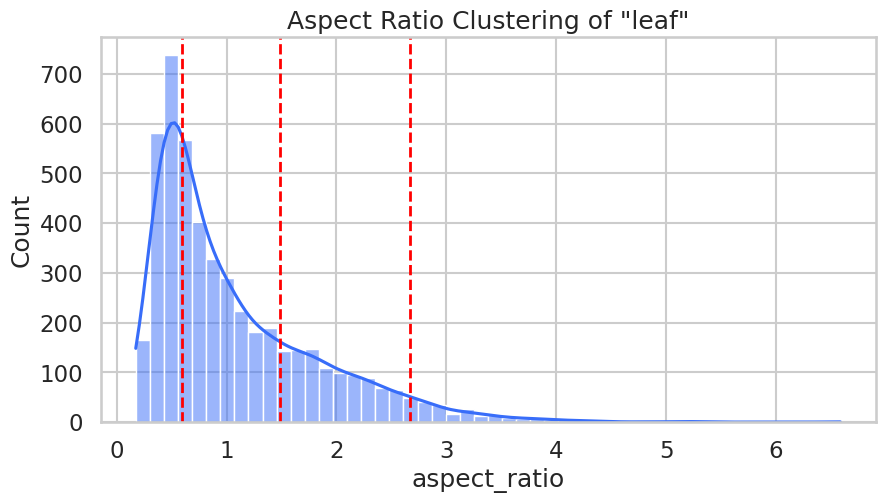

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

for group, sdf in df.groupby('category'):
    
    aspect_ratios = np.array(sdf.aspect_ratio).reshape(-1, 1)
    
    kmeans.fit(aspect_ratios)
    
    recos = sorted([round(r, 3) for r in kmeans.cluster_centers_.flatten().tolist()])
    
    print(f'Recommendations for anchor ratios of "{group}": {recos}')
    
    plt.figure(figsize=(10, 5))
    plt.title(f'Aspect Ratio Clustering of "{group}"')
    sns.histplot(sdf.aspect_ratio, bins=50, kde=True)
    for center in kmeans.cluster_centers_:
        plt.axvline(center, color='r', linestyle='dashed', linewidth=2)

# Discover Recommended Anchor Scales

Recommendations for anchor sizes of "berry"
   cluster  counts                                    center  ratio            sizes
1        1    1449               [75.2050275862069, 74.3854]  1.011     [80, 80, 80]
0        0    1408    [49.84734853884533, 49.13697077690664]  1.014     [48, 48, 48]
4        4     828  [104.20614182692307, 101.97766826923076]  1.022    [96, 96, 112]
2        2     226  [159.63725663716815, 156.79309734513274]  1.018  [160, 160, 160]
3        3      57  [257.64543859649126, 253.52192982456137]  1.016  [256, 256, 256]

Recommended Anchor Sizes: [48, 48, 96, 112, 160]
Recommended Anchor Ratios: [1.011, 1.014, 1.016]





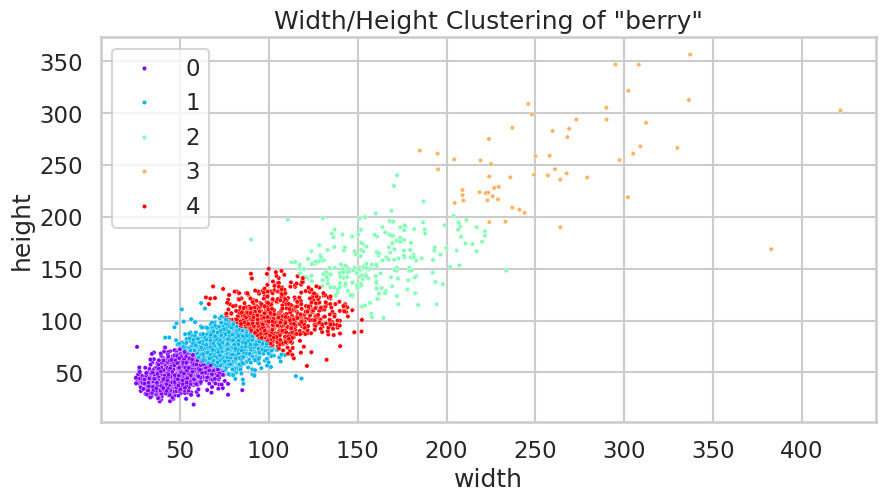

Recommendations for anchor sizes of "leaf"
   cluster  counts                                    center  ratio             sizes
3        3    2011  [210.53491786958685, 167.67042807366855]  1.256   [160, 192, 208]
2        2    1474    [226.398744059742, 413.00982348947724]  0.548   [224, 320, 416]
1        1     588    [371.7386101694915, 741.1770677966101]  0.502   [368, 560, 736]
0        0     539   [562.0088148148147, 375.36387037037036]  1.497   [368, 464, 560]
4        4     246   [843.5113414634145, 1025.4419918699186]  0.823  [848, 928, 1024]

Recommended Anchor Sizes: [160, 192, 368, 848, 928]
Recommended Anchor Ratios: [0.502, 0.823, 1.497]





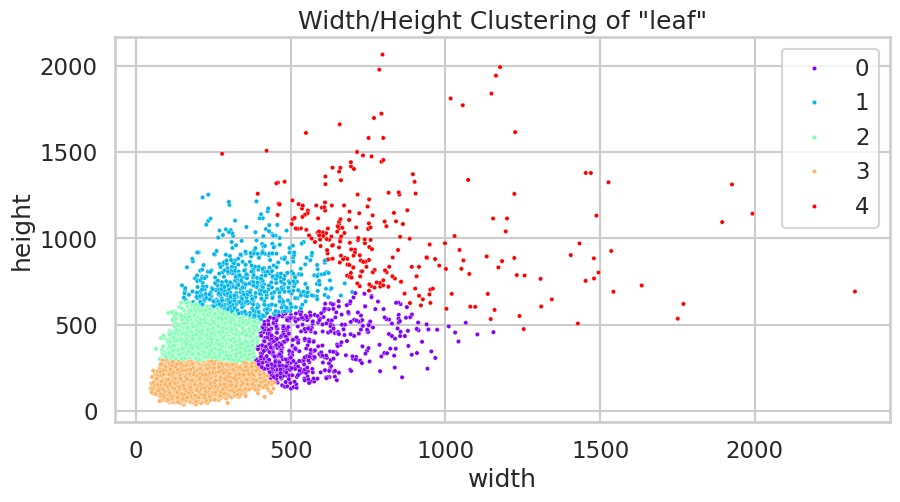

In [7]:
# other clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def snap(x, step):
    return round(x / step) * step

# pandas display width
pd.set_option('display.width', 1000)

cluster_amount = 5
#model = KMeans(n_clusters=cluster_amount)
model = KMeans(n_clusters=cluster_amount)

for group, sdf in df.groupby('category'):
    
    sdf['log_w'] = np.log(sdf.width)
    sdf['log_h'] = np.log(sdf.height)
    
    # remove outliers of log width
    #sdf = sdf[(sdf.log_w > np.percentile(sdf.log_w, 5)) & (sdf.log_w < np.percentile(sdf.log_w, 95))]

    # remove outliers of log height
    #sdf = sdf[(sdf.log_h > np.percentile(sdf.log_h, 5)) & (sdf.log_h < np.percentile(sdf.log_h, 95))]
    
    width = np.array(sdf.width).reshape(-1, 1)
    height = np.array(sdf.height).reshape(-1, 1)
    
    x = np.concatenate([width, height], axis=1)
    
    model.fit(x)

    centers = model.cluster_centers_.tolist()
    
    clusters = []
    for i in range(cluster_amount):
        clusters.append({
            'cluster': i,
            'counts': 0,
            'center': centers[i],
            'ratio': round(centers[i][0] / centers[i][1], 3),
            'sizes': sorted([
                snap(centers[i][0], 16),
                snap(((centers[i][0] + centers[i][1]) / 2), 16),
                snap(centers[i][1], 16)
            ])
        })
    
    for point in model.labels_:
        clusters[point]['counts'] += 1
        
    cdf = pd.DataFrame(clusters)
    
    sizes = []
    for row in cdf.iterrows():
        sizes.extend(row[1]['sizes'])
    sizes = list(set(sorted(sizes)))
    
    ratios = []
    for row in cdf.iterrows():
        ratios.append(row[1]['ratio'])
    ratios = list(set(sorted(ratios)))
    
    # choice 5 anchor sizes equally spaced
    sizes = sorted([sizes[0], sizes[len(sizes) // 4], sizes[len(sizes) // 2], sizes[(len(sizes) // 4) * 3], sizes[-1]])

    # chose 3 anchor ratios
    ratios = sorted([ratios[0], ratios[len(ratios) // 2], ratios[-1]])

    print(f'Recommendations for anchor sizes of "{group}"')
    print(cdf.sort_values('counts', ascending=False))
    print('')
    print(f'Recommended Anchor Sizes: {sizes}')
    print(f'Recommended Anchor Ratios: {ratios}')
    print('\n\n')
    
    plt.figure(figsize=(10, 5))
    plt.title(f'Width/Height Clustering of "{group}"')

    sns.scatterplot(x='width', y='height', data=sdf, s=10, hue=model.labels_, palette='rainbow')
    #sns.jointplot(x='width', y='height', data=sdf, kind='hist', hue=model.labels_, palette='rainbow')
    
    # get all sizes and flatten
    
    
    
    
    #for row in cdf.iterrows():
    #    center = row[1]['center']
    #    plt.scatter(center[0], center[1], color='r', s=100, marker='x')

    plt.show()